# Step-by-step guide to retrieving data from USGS API

## Example: 
### Get streamflow data from selected gage for time period of interest & plot timeseries results

In [107]:
# Import libraries

%matplotlib inline
import pandas as pd
import requests
import json
from datetime import datetime
from collections import OrderedDict

In [26]:
# Enter Desired Data
gage       = "01646500"                              # USGS Gage    

y0, m0 ,d0 = 2013, 4, 30                             # Start date (year, month, day)
y1, m1 ,d1 = 2014, 5, 10                             # End date

parameter  = "00060"                                 # Parameter 
obser      = "StreamFlow"                            # Observed data Requested
dformat    = "json"                                  # Data Format  
url        = 'http://waterservices.usgs.gov/nwis/iv' # USGS API

In [10]:
# Create Datetime Objects
start     = datetime(y0, m0, d0,0)    
stop      = datetime(y1, m1 ,d1,0)         

# Format Datetime Objects for USGS API
first    =  datetime.date(start).strftime('%Y-%m-%d')
last     =  datetime.date(stop).strftime('%Y-%m-%d') 

In [46]:
# Ping the USGS API for data

params = OrderedDict([('format',dformat),('sites',gage),('startDT',first), 
            ('endDT',last), ('parameterCD',parameter)])  

r = requests.get(url, params = params) 
print("Retrieved Data for USGS Gage: ", gage)
data = r.content.decode()
d = json.loads(data)

Retrieved Data for USGS Gage:  01646500


In [90]:
# Take a peak at the JSON output:
d

{'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'globalScope': True,
 'name': 'ns1:timeSeriesResponseType',
 'nil': False,
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'typeSubstituted': False,
 'value': {'queryInfo': {'criteria': {'locationParam': '[ALL:01646500]',
    'parameter': [],
    'timeParam': {'beginDateTime': '2013-04-30T00:00:00.000',
     'endDateTime': '2014-05-10T23:59:59.000'},
    'variableParam': '[00060]'},
   'note': [{'title': 'filter:sites', 'value': '[ALL:01646500]'},
    {'title': 'filter:timeRange',
     'value': '[mode=RANGE, modifiedSince=null] interval={INTERVAL[2013-04-30T00:00:00.000-04:00/2014-05-10T23:59:59.000Z]}'},
    {'title': 'filter:methodId', 'value': 'methodIds=[ALL]'},
    {'title': 'requestDT', 'value': '2016-10-11T16:49:12.097Z'},
    {'title': 'requestId', 'value': 'a2f09a00-8fd2-11e6-911f-3440b59d3362'},
    {'title': 'disclaimer',
     'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.go

In [92]:
# There is alot of meta data we don't need here, lets dig deeper:
d['value']

{'queryInfo': {'criteria': {'locationParam': '[ALL:01646500]',
   'parameter': [],
   'timeParam': {'beginDateTime': '2013-04-30T00:00:00.000',
    'endDateTime': '2014-05-10T23:59:59.000'},
   'variableParam': '[00060]'},
  'note': [{'title': 'filter:sites', 'value': '[ALL:01646500]'},
   {'title': 'filter:timeRange',
    'value': '[mode=RANGE, modifiedSince=null] interval={INTERVAL[2013-04-30T00:00:00.000-04:00/2014-05-10T23:59:59.000Z]}'},
   {'title': 'filter:methodId', 'value': 'methodIds=[ALL]'},
   {'title': 'requestDT', 'value': '2016-10-11T16:49:12.097Z'},
   {'title': 'requestId', 'value': 'a2f09a00-8fd2-11e6-911f-3440b59d3362'},
   {'title': 'disclaimer',
    'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.'},
   {'title': 'server', 'value': 'nadww02'}],
  'queryURL': 'http://nwis.waterservices.usgs.gov/nwis/iv/format=json&sites=01646500&startDT=2013-04-30&endDT=2014-05-10&parameterCD=00060'},
 '

In [93]:
# Still not where we need to be, lets go down another level:
d['value']['timeSeries']

[{'name': 'USGS:01646500:00060:00011',
  'sourceInfo': {'geoLocation': {'geogLocation': {'latitude': 38.94977778,
     'longitude': -77.12763889,
     'srs': 'EPSG:4326'},
    'localSiteXY': []},
   'note': [],
   'siteCode': [{'agencyCode': 'USGS',
     'network': 'NWIS',
     'value': '01646500'}],
   'siteName': 'POTOMAC RIVER NEAR WASH, DC LITTLE FALLS PUMP STA',
   'siteProperty': [{'name': 'siteTypeCd', 'value': 'ST'},
    {'name': 'hucCd', 'value': '02070008'},
    {'name': 'stateCd', 'value': '24'},
    {'name': 'countyCd', 'value': '24031'}],
   'siteType': [],
   'timeZoneInfo': {'daylightSavingsTimeZone': {'zoneAbbreviation': 'EDT',
     'zoneOffset': '-04:00'},
    'defaultTimeZone': {'zoneAbbreviation': 'EST', 'zoneOffset': '-05:00'},
    'siteUsesDaylightSavingsTime': False}},
  'values': [{'censorCode': [],
    'method': [{'methodDescription': '', 'methodID': 69928}],
    'offset': [],
    'qualifier': [{'network': 'NWIS',
      'qualifierCode': 'A',
      'qualifierDesc

In [95]:
# Let's see what the keys are in the JSON output:
mydict = dict(d['value']['timeSeries'][0])
for key in mydict: print(key)

values
sourceInfo
name
variable


In [96]:
# Now, Lets dig a little deeper into one of the keys:
mydict['sourceInfo']

{'geoLocation': {'geogLocation': {'latitude': 38.94977778,
   'longitude': -77.12763889,
   'srs': 'EPSG:4326'},
  'localSiteXY': []},
 'note': [],
 'siteCode': [{'agencyCode': 'USGS', 'network': 'NWIS', 'value': '01646500'}],
 'siteName': 'POTOMAC RIVER NEAR WASH, DC LITTLE FALLS PUMP STA',
 'siteProperty': [{'name': 'siteTypeCd', 'value': 'ST'},
  {'name': 'hucCd', 'value': '02070008'},
  {'name': 'stateCd', 'value': '24'},
  {'name': 'countyCd', 'value': '24031'}],
 'siteType': [],
 'timeZoneInfo': {'daylightSavingsTimeZone': {'zoneAbbreviation': 'EDT',
   'zoneOffset': '-04:00'},
  'defaultTimeZone': {'zoneAbbreviation': 'EST', 'zoneOffset': '-05:00'},
  'siteUsesDaylightSavingsTime': False}}

In [97]:
# Great, We can pull the station name, and assign to a variable for use later:
SiteName = mydict['sourceInfo']['siteName']
print(SiteName)

POTOMAC RIVER NEAR WASH, DC LITTLE FALLS PUMP STA


In [98]:
# After reveiwing the JSON Data structure, select only data we need: 
tseries = d['value']['timeSeries'][0]['values'][0]['value'][:]

In [102]:
# Create a Dataframe, format Datetime data,and assign numeric type to observations
df = pd.DataFrame.from_dict(tseries)
df.index = pd.to_datetime(df['dateTime'],format='%Y-%m-%d{}%H:%M:%S'.format('T'))

df['UTC Offset'] = df['dateTime'].apply(lambda x: x.split('-')[3][1])
df['UTC Offset'] = df['UTC Offset'].apply(lambda x: pd.to_timedelta('{} hours'.format(x)))

df.index = df.index - df['UTC Offset']
df.value = pd.to_numeric(df.value)

In [103]:
df.head()

,dateTime,qualifiers,value,UTC Offset
2013-04-30 00:00:00,2013-04-30T00:00:00.000-05:00,[A],9240,05:00:00
2013-04-30 00:15:00,2013-04-30T00:15:00.000-05:00,[A],9240,05:00:00
2013-04-30 00:30:00,2013-04-30T00:30:00.000-05:00,[A],9240,05:00:00
2013-04-30 00:45:00,2013-04-30T00:45:00.000-05:00,[A],9240,05:00:00
2013-04-30 01:00:00,2013-04-30T01:00:00.000-05:00,[A],9240,05:00:00


In [104]:
# Get Rid of unwanted data, rename observed data
df = df.drop('dateTime', 1)
df.drop('qualifiers',axis = 1, inplace = True)
df.drop('UTC Offset',axis = 1, inplace = True)
df = df.rename(columns = {'value':obser})
df.head()

,StreamFlow
2013-04-30 00:00:00,9240
2013-04-30 00:15:00,9240
2013-04-30 00:30:00,9240
2013-04-30 00:45:00,9240
2013-04-30 01:00:00,9240


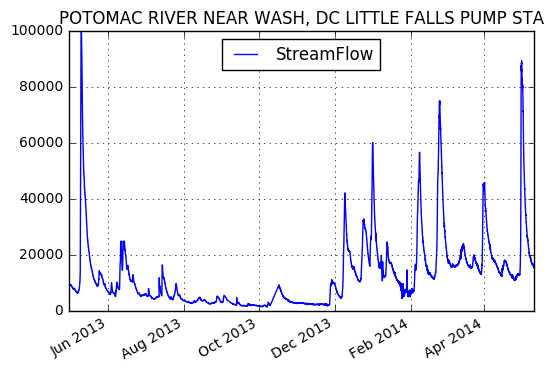

In [106]:
# Plot the Results, and use the SiteName as a title!
df.plot(grid = True, title = SiteName)